In [4]:
import pandas as pd
url = "https://raw.githubusercontent.com/pia222sk20/python_src/refs/heads/main/data/tellecom.csv"
df=pd.read_csv(url)
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.info()
# 19  TotalCharges      7043 non-null   object ==> head() 에 보이는건 숫자인데 object로 보임. 확인 필요!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
# TotalCharges 컬럼에서 숫자형태의 문자가 아닌 값은 결측치 처리한다.

pd.to_numeric(df.TotalCharges)  #에러 출력결과 : ValueError: Unable to parse string " " at position 488 ==> 공백이 있음을 확인

ValueError: Unable to parse string " " at position 488

In [7]:
# pd.to_numeric : 문자열(string)이나 다른 자료형을 숫자형(int, float)으로 변환해주는 판다스 함수
# errors='coerce' 옵션
    # 변환이 실패했을 때 어떻게 처리할지를 지정합니다.
    # errors='raise' (기본값): 변환 불가능한 값이 있으면 에러 발생.
    # errors='ignore': 변환 불가능한 값은 그대로 둠 (문자열 그대로 남음).
    # errors='coerce': 변환 불가능한 값은 NaN으로 처리.

# pd.to_numeric(df.TotalCharges, errors='ignore')
# pd.to_numeric(df.TotalCharges, errors='coerce').isna().sum() 
df.TotalCharges = pd.to_numeric(df.TotalCharges, errors='coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


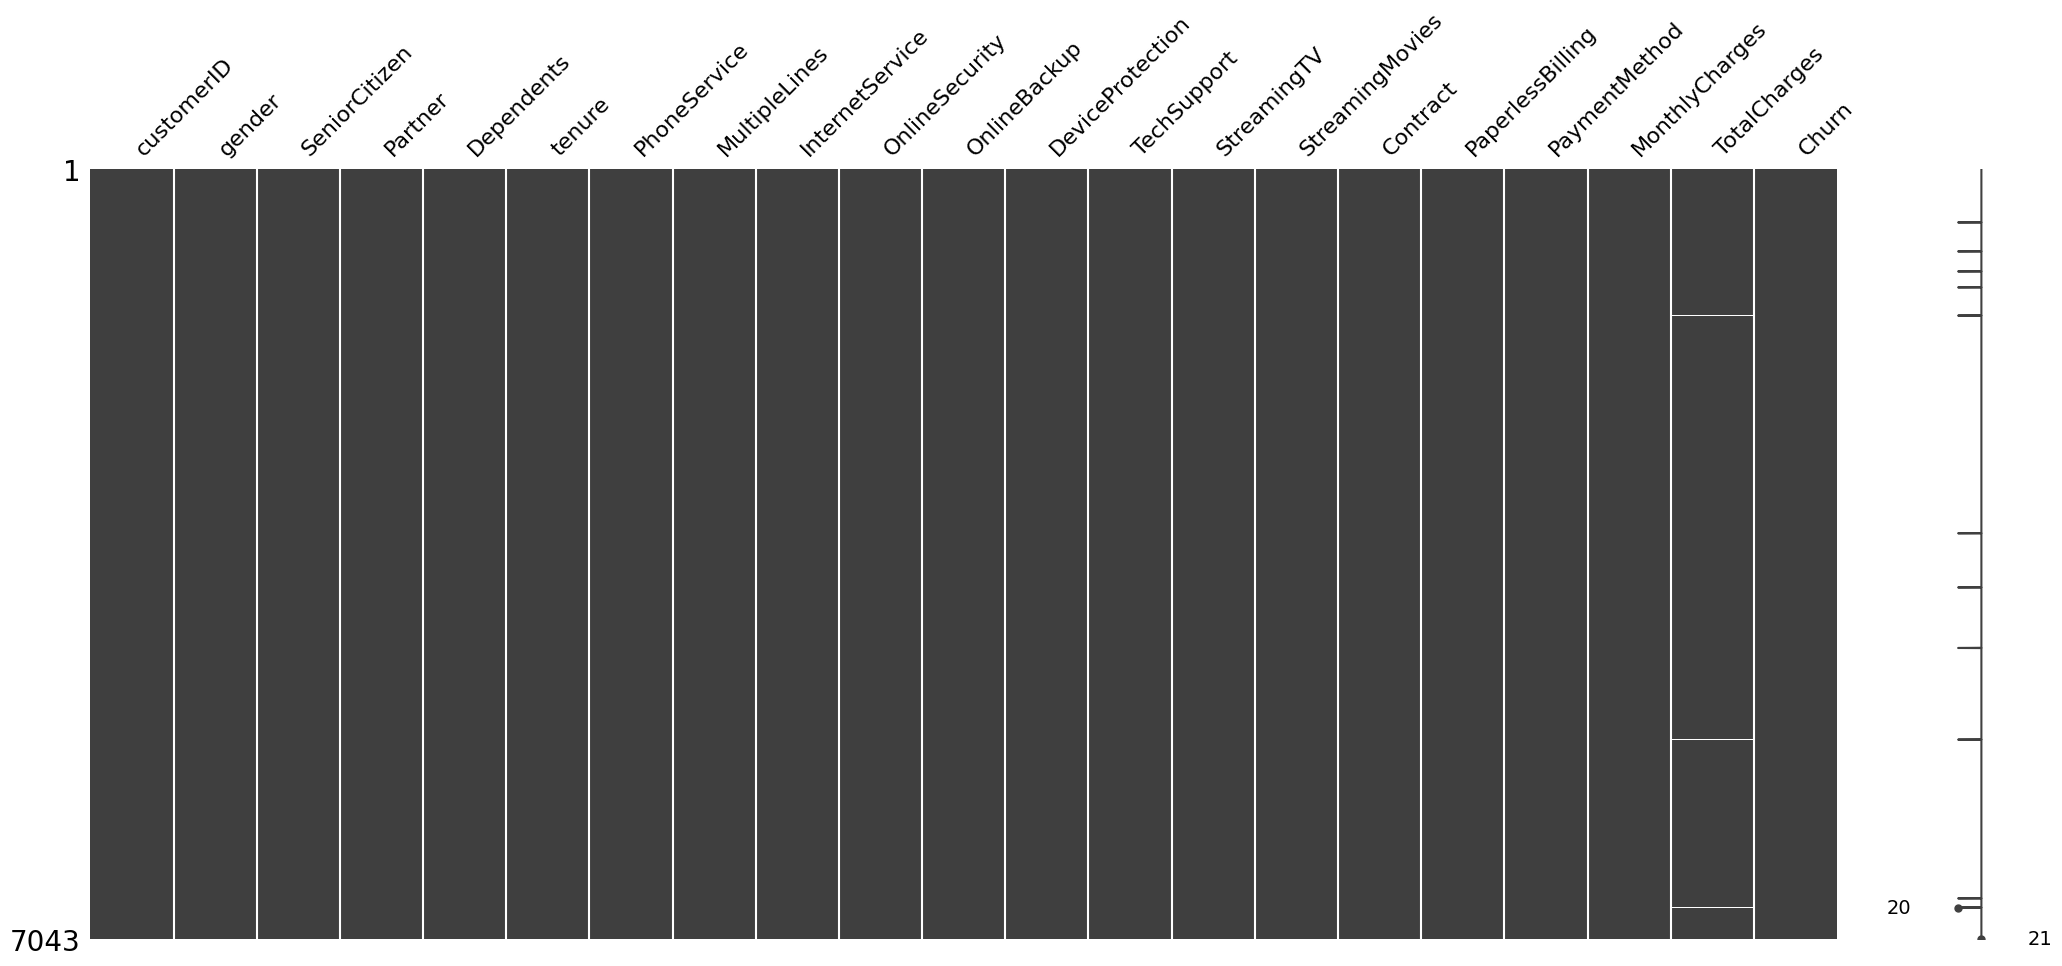

In [8]:
#결측치 시각화
# missingno 라이브러리 활용
import missingno as msno
import matplotlib.pyplot as plt


# 매트릭스 그래프
msno.matrix(df)
plt.show()

In [9]:
df.isna().mean()  #totalcharege 결측치 비율은 0.001562 ==> 해당결측치 row 데이터를 삭제
# df.info()
print(len(df))
df2=df.dropna(subset=['TotalCharges'])
print(len(df2))

# msno.matrix(df)
# plt.show()


7043
7032


In [10]:
# 이탈여부 Churn ==> yes no 를 1, 0으로 변경 ==> 분석하기 용이함
# df2['Churn'] = df2['Churn'].map({'No':0, 'Yes':1})   
# map 위험. 
# 이거 2번 실행하면 0,1이 NaN으로 바뀜! 주의할 것!
# 그리고 No, Yes로만 이루어져 있는지 확인이 안되기 때문에 이렇게 No, Yes로만 하면 누락될 수 있음.

#일단 우선 값이 No, Yes로만 이루어져 있는지 확인해야함!!!
df2['Churn'].value_counts()
df2.Churn.unique()

df2['Churn'] = df2['Churn'].map({'No':0, 'Yes':1})   

C:\Users\playdata2\AppData\Local\Temp\ipykernel_16504\1212503336.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Churn'] = df2['Churn'].map({'No':0, 'Yes':1})


In [11]:
df2['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7032, dtype: int64

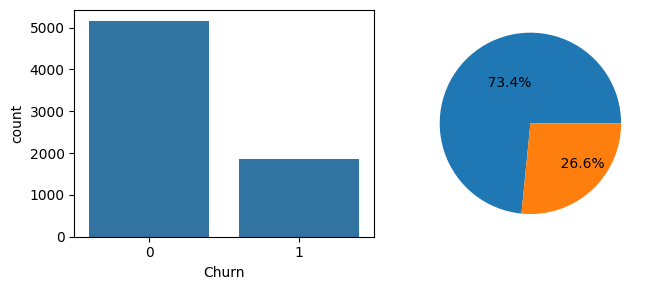

In [12]:
# 이탈고객의 현황
# countplot
# 계약종류, 가입기간
# 타깃이 되는 변수와 같이 영향을 미치는 다른 변수와의 관계
import seaborn as sns
import matplotlib.pyplot as plt

f, ax = plt.subplots(1,2, figsize=(7, 3))
sns.countplot(data=df2, x='Churn', ax=ax[0])
ax[1].pie(x=df2.Churn.value_counts(), autopct='%11.1f%%')
# 위와 같은 결과:
    # df2.Churn.value_counts().plt.pie(autopct='%11.1f%%', ax=ax[1])
ax[1].legend


plt.tight_layout()
plt.show()



# titanic.Survived.value_counts().plot.pie(autopct='%11.1f%%', shadow=True, explode = [0, 0.1], figsize=(6,6), ax=ax[0])
# ax[0].set_title('생존여부')
# titanic.Survived.value_counts().plot(kind='bar', ax=ax[1], figsize=(7,3))
# ax[1].set_title('생존 인원수')


In [13]:
#타깃이 되는 변수와 같이 영향을 미치는 다른 변수와의 관계
#비용에 따른 가입유지여부 확인
#TotalCharges를 3등분해서 (H, M, L)  -> 새로운 컬럼에 추가

# ========================DJ===============================
# import numpy as np
# cnt,bins = np.histogram(df2['TotalCharges'],bins=3)

# labels = ['low', 'medium', 'hight']
# df2['TotalCharges_level']=pd.cut(df2['TotalCharges'],
#         bins = bins,
#         labels = labels       
#        )
# df2.head()
# ========================DJ===============================




df2['TotalCharges_Rank']=pd.qcut(df['TotalCharges'], q=3, labels=['L', 'M', 'H'])
df2.head()



C:\Users\playdata2\AppData\Local\Temp\ipykernel_16504\3472373466.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['TotalCharges_Rank']=pd.qcut(df['TotalCharges'], q=3, labels=['L', 'M', 'H'])


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,TotalCharges_Rank
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0,L
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,No,No,No,One year,No,Mailed check,56.95,1889.50,0,M
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1,L
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0,M
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1,L


TotalCharges_Rank
L    2344
M    2344
H    2344
Name: count, dtype: int64

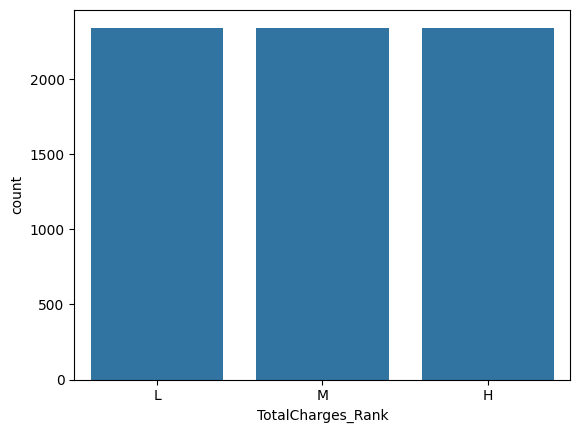

In [14]:
#새로운 컬럼별 가입여부에 대한 groupby 를 해서 시각화 까지
sns.countplot(data=df2, x='TotalCharges_Rank')  #==> 갯수 별로 위에서 qcut 했기 때문에 (quantity) 모든 수량이 같이 나옴.
# ==> 의미없는 그래프

df2.TotalCharges_Rank.value_counts()  
# 출력
# TotalCharges_Rank
# L    2344
# M    2344
# H    2344


<Axes: xlabel='TotalCharges_Rank', ylabel='count'>

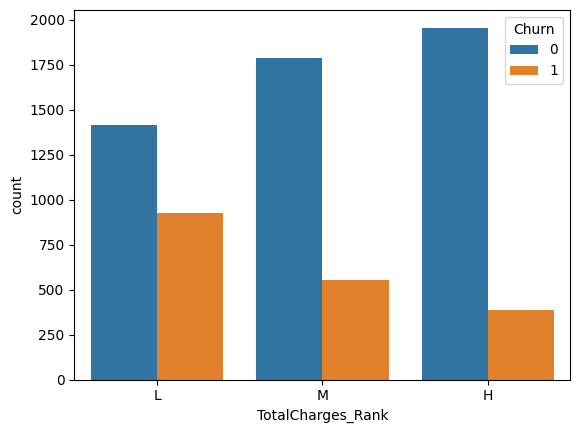

In [15]:
# "전체 금액 랭크 에 따른 이탈 수" 를 차트로 보는게 적합
sns.countplot(data=df2, x='TotalCharges_Rank', hue='Churn') 

C:\Users\playdata2\AppData\Local\Temp\ipykernel_16504\1225849322.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['MonthlyCharges_Rank']=pd.qcut(df['MonthlyCharges'], q=3, labels=['Month_L', 'Month_M', 'Month_H'])


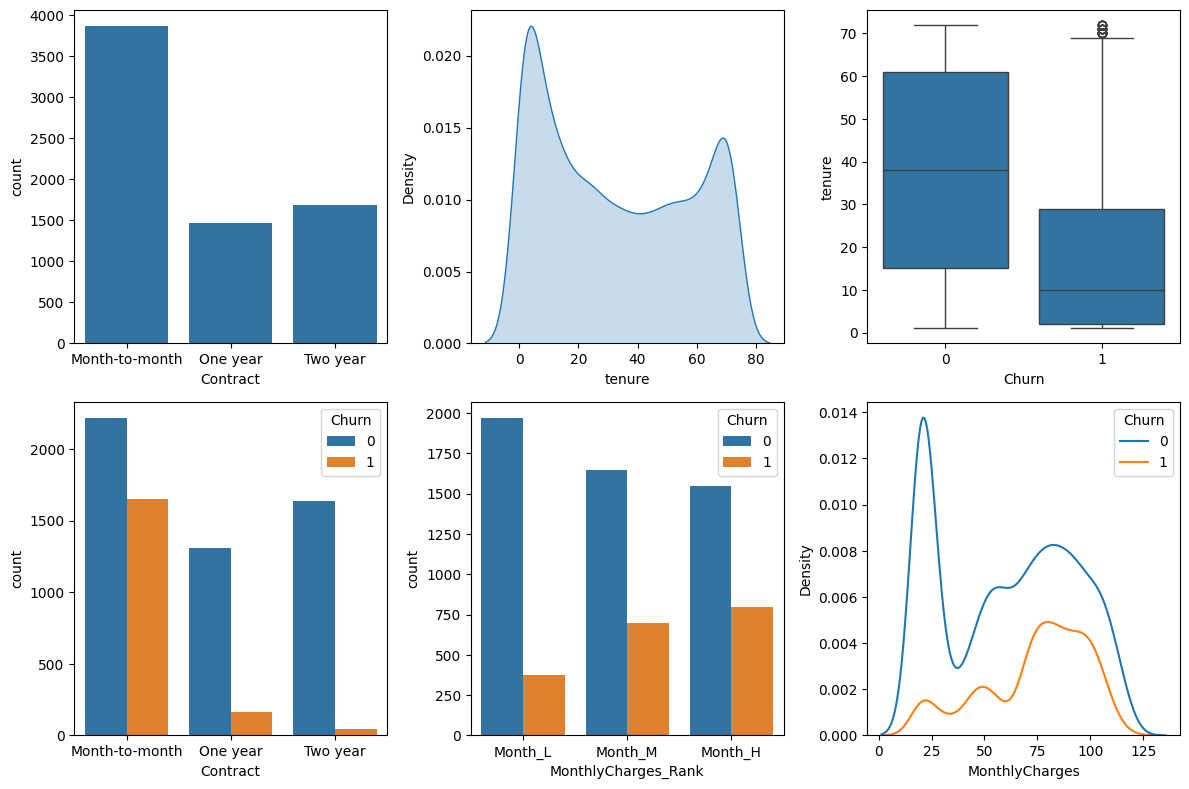

In [16]:
f,ax=plt.subplots(2,3, figsize=(12,8))

# 계약종류(Contract)에 따른 고객 분포
sns.countplot(data=df2, x='Contract', ax=ax[0][0])



# 가입기간 (tenure)  분포
# =================== DJ =================== 
sns.kdeplot(data=df2, x='tenure', fill=True, ax=ax[0][1])
# =================== DJ ===================


# 가입기간에 따른 이탈율 분포
sns.boxplot(data=df2, x='Churn', y='tenure', ax=ax[0][2])



# 계약 종류에 따른 이탈율
sns.countplot(data=df2, x='Contract', hue='Churn', ax=ax[1][0]) 



# 월 요금에 따른 이탈률
# =================== DJ ===================
df2['MonthlyCharges_Rank']=pd.qcut(df['MonthlyCharges'], q=3, labels=['Month_L', 'Month_M', 'Month_H'])
sns.countplot(data=df2, x='MonthlyCharges_Rank', hue='Churn', ax=ax[1][1]) 
# =================== DJ ===================

sns.kdeplot(data=df2, x='MonthlyCharges', hue='Churn', ax=ax[1][2])



plt.tight_layout()
plt.show()


In [17]:
df2.head(2)
df2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 0 to 7042
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   customerID           7032 non-null   object  
 1   gender               7032 non-null   object  
 2   SeniorCitizen        7032 non-null   int64   
 3   Partner              7032 non-null   object  
 4   Dependents           7032 non-null   object  
 5   tenure               7032 non-null   int64   
 6   PhoneService         7032 non-null   object  
 7   MultipleLines        7032 non-null   object  
 8   InternetService      7032 non-null   object  
 9   OnlineSecurity       7032 non-null   object  
 10  OnlineBackup         7032 non-null   object  
 11  DeviceProtection     7032 non-null   object  
 12  TechSupport          7032 non-null   object  
 13  StreamingTV          7032 non-null   object  
 14  StreamingMovies      7032 non-null   object  
 15  Contract             7032 

In [18]:
df2.describe()     #수치형 데이터의 decribe를 보여줌
df2.describe().columns  #수치형 데이터의 컬럼만 보여줌

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn'], dtype='object')

<Axes: >

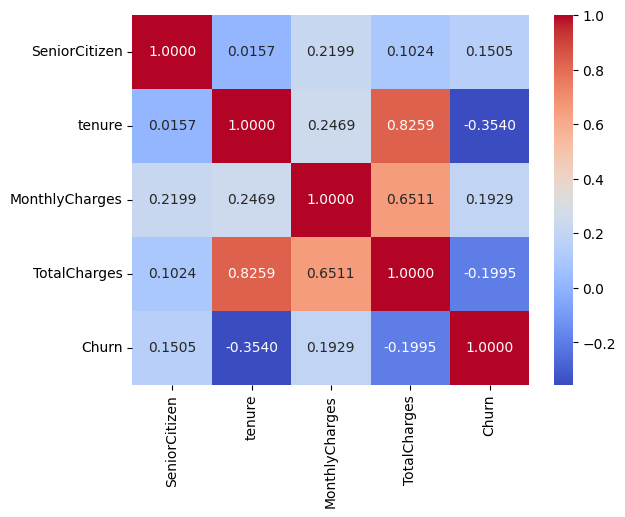

In [19]:
# 상관관계 분석 (Correlation Analysis)
# 상관관계는 object로 할 수 없음. 
# 상관관계 : 데이터를 수치형 데이터들로만 (문자열이 아님) 구성해서 .corr() 적용

# =================== DJ =================== (결과는 동일함.)
# df3= df2.loc[:, ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']]
# df3.corr()
# =================== DJ ===================

# 강사님

temp = df2.loc[:, df2.describe().columns].corr()
temp 
# 해석 1에 가까운 수치일수록 상관관계가 있음을 확인 할 수 있음. 
# TotalCharges - tenure	:0.825880 ==> 의미있는 수치
# 양의 상관관계 ==> X가 높을수록 Y도 높아짐 
# 음의 상관관계 ==> X가 높을수록 Y는 낮아짐??

# sns.heatmap(df2.loc[:, df2.describe().columns].corr())
sns.heatmap(temp, annot=True, cmap='coolwarm', fmt='.4f')

#annot ==> 각 셀에 숫자를 표시
#cmap ==> 색상테마, 양수 붉은색, 음수 파란색
#fmt='.4f' ==> 숫자를 소수점 넷째자리까지 표시

In [ ]:
# 상관관계
# 'pearson', 'kendall', 'spearman'
# pearson : 변수들 사이에 선형관계
# spearman : 선형관계가 아닌 비선형관계, 이상치가 있을 때 순위로 바꾸면 이상치의 영향이 크게 줄어든다.
    # 순서데이터 : 만족도 등과 같이 값 자체가 순서인 데이터
            # ex. 90 80 70 75 60 에 대한 순위를 매겨서 사용
            # ex. 만족, 보통, 불만족 
            # ex. xs, s, m, l, xl  
# kendall : 데이터 샘플이 적을 때 / 일치하는 쌍과 불일치하는 쌍의 갯수를 세아림


In [22]:
df2.describe(include='object')
#제외할 칼럼 (불필요한 것들)
remove_cols=['cutomerID']

In [23]:
# 수치형 데이터 추출
# 상관계수의 값을 통해 값이 높거나 낮은 변수들은 한개만 선택(제외)
# 고객 아이디는 제거
preprocess_df2 = df2.loc[:, df2.describe().columns].drop(columns=['TotalCharges'])
preprocess_df2.head()

,SeniorCitizen,tenure,MonthlyCharges,Churn
0,0,1,29.85,0
1,0,34,56.95,0
2,0,2,53.85,1
3,0,45,42.30,0
4,0,2,70.70,1


In [24]:
X = preprocess_df2.iloc[:, :-1]
Y = preprocess_df2['Churn']

In [26]:
import numpy as np
# X 전체데이터의 80% 만 가지고 와
split_indexs = int(np.round(len(X)*0.8))
train_x = X[ : split_indexs]
test_x = X[split_indexs : ]
train_y = Y[ : split_indexs]
test_y = Y[split_indexs : ]

len(train_x), len(train_y), len(test_x), len(test_y)

(5626, 5626, 1406, 1406)